In [3]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score
from numpy import where
from collections import Counter
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%run HealthyvsCancer.ipynb


   length_51  length_52  length_53  length_54  length_55  length_56  \
0   0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1   0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2   0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3   0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4   0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   

   length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0   0.000122   0.000115   0.000151   0.000167  ...    0.007396    0.007193   
1   0.007748   0.008088   0.008671   0.008835  ...    0.017830    0.017033   
2   0.004960   0.005605   0.005919   0.006480  ...    0.010957    0.010481   
3   0.005475   0.006158   0.007174   0.007697  ...    0.010032    0.008933   
4   0.013024   0.014853   0.016874   0.017501  ...    0.009118    0.008535   

   length_394  length_395  length_396  length_397  length_398  length_399  \
0    0.006973    0.006481  

NameError: name 'xvals' is not defined

NameError: name 'xvals' is not defined

In [3]:

train_x = xvals_train_filtered
train_y = yvals_binary

test_y = yvals_test
test_x = xvals_test_filtered



C:\Users\haris\AppData\Local\Temp\ipykernel_34172\3253114457.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['class_label'] = test_data['class_label'].replace(['healthy', 'early stage cancer', 'screening stage cancer', 'mid stage cancer', 'late stage cancer'], [0, 1, 1, 1, 1])


In [4]:
# Define pipeline for SMOTE 
smote_pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy= 'minority')),
    ('classifier', KNeighborsClassifier())
])

# Define parameter grids for SMOTE 
smote_param_grid = {
    'sampling__k_neighbors': [3, 5, 7],
    'classifier__n_neighbors': range(2, 30)
}

# Perform grid search for SMOTE 
smote_grid_search = GridSearchCV(smote_pipeline, smote_param_grid, cv=5, scoring='f1')
smote_grid_search.fit(train_x, train_y)

best_params_smote = smote_grid_search.best_params_
print(best_params_smote)

{'classifier__n_neighbors': 3, 'sampling__k_neighbors': 3}


In [5]:
smote = SMOTE(k_neighbors=best_params_smote['sampling__k_neighbors'])
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
class_counts = train_y_smote.value_counts()
print(class_counts)

class_label
0    2133
1    2133
Name: count, dtype: int64


In [6]:
under_sampler_pipeline = Pipeline([
    ('sampling', RandomUnderSampler()),
    ('classifier', KNeighborsClassifier())
])

under_sampler_param_grid = {
    'sampling__sampling_strategy': np.linspace(0.1, 1.0, 50),  # Adjust the range and step size as needed
    'sampling__replacement': [True, False],
    'classifier__n_neighbors': range(2, 30)
}



under_sampler_grid_search = GridSearchCV(under_sampler_pipeline, under_sampler_param_grid, cv=5, scoring='f1')
under_sampler_grid_search.fit(train_x_smote, train_y_smote)


best_params_under_sampler = under_sampler_grid_search.best_params_

print(best_params_under_sampler)

{'classifier__n_neighbors': 3, 'sampling__replacement': False, 'sampling__sampling_strategy': 1.0}


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
13720 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\har

In [ ]:
#SMOTE() = (*, sampling_strategy: str = "auto", random_state: Any | None = None, k_neighbors: int = 5, n_jobs: Any | None = None) -> None
#RandomUnderSampler() = (*, sampling_strategy: str = "auto", random_state: Any | None = None, replacement: bool = False) -> None

In [113]:
undersampler = RandomUnderSampler(sampling_strategy=best_params_under_sampler['sampling__sampling_strategy'], 
                                  replacement=best_params_under_sampler['sampling__replacement'])

train_x, train_y = undersampler.fit(train_x_smote,train_y_smote)

class_counts = train_y.value_counts()
print(class_counts)

class_label
0    2133
1    2133
Name: count, dtype: int64


ValueError: The specified ratio required to generate new sample in the majority class while trying to remove samples. Please increase the ratio.

In [95]:
train_x, train_y = combined_pipeline.named_steps['sampling'].fit_resample(
    sample_data.drop(columns=['class_label']),
    sample_data['class_label']
)
print("Size of train_x:", train_x.shape)
print("Size of train_y:", train_y.shape)
class_counts = train_y.value_counts()
print(class_counts)

print("Size of test_x:", test_x.shape)
print("Size of test_y:", test_y.shape)
class_counts_test = test_y.value_counts()
print(class_counts_test)

# Print feature names of train_x
print("Feature names in train_x:")
print(train_x.columns.tolist())

# Print feature names of test_x
print("Feature names in test_x:")
print(test_x.columns.tolist())

Size of train_x: (4266, 20)
Size of train_y: (4266,)
class_label
0    2133
1    2133
Name: count, dtype: int64
Size of test_x: (1033, 350)
Size of test_y: (1033,)
class_label
1    993
0     40
Name: count, dtype: int64
Feature names in train_x:
['length_51', 'length_52', 'length_53', 'length_54', 'length_55', 'length_81', 'length_130', 'length_137', 'length_164', 'length_166', 'length_167', 'length_190', 'length_233', 'length_279', 'length_290', 'length_335', 'length_341', 'length_343', 'length_345', 'length_390']
Feature names in test_x:
['length_51', 'length_52', 'length_53', 'length_54', 'length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85',

In [91]:
knn_classifier = KNeighborsClassifier(n_neighbors=best_params_smote['classifier__n_neighbors'])
knn_classifier.fit(train_x, train_y)
accuracy = knn_classifier.score(test_x, test_y)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- length_100
- length_101
- length_102
- length_103
- length_104
- ...


In [18]:
#hyper parameter tuning
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(train_x, train_y)
    train_score[neighbor]=knn.score(train_x, train_y)
    test_score[neighbor]=knn.score(test_x, test_y)

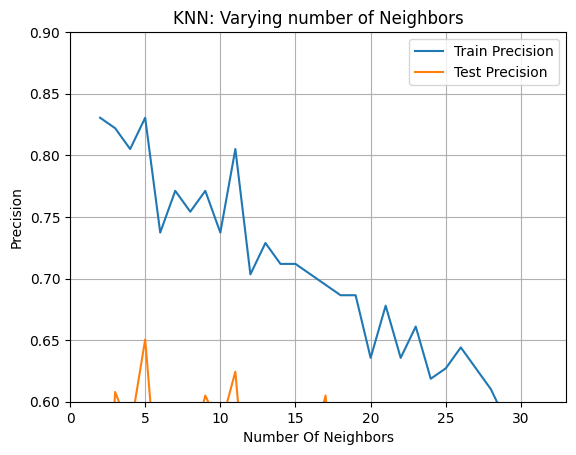

In [30]:
plt.plot(n_neighbors, train_score.values(), label="Train Precision")
plt.plot(n_neighbors, test_score.values(), label="Test Precision")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Precision")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [31]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

5


In [32]:
#using Gridsearch cv
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(train_x, train_y)
print("Best parameters:", knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 3}


In [24]:
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(train_x, train_y)
y_pred=knn.predict(test_x)
accuracy_score=accuracy_score(test_y, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 48.98%


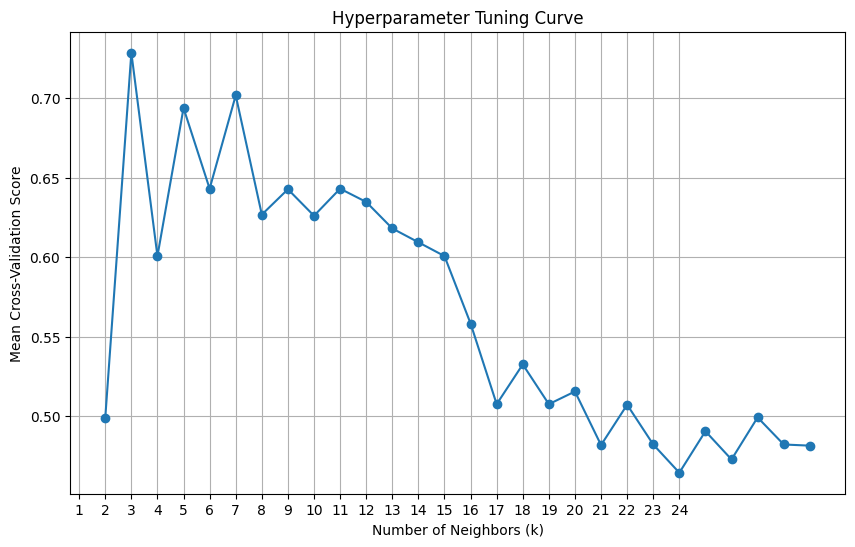

In [28]:
means = knn_cv.cv_results_['mean_test_score']
params = knn_cv.cv_results_['param_n_neighbors'].data.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(params, means, marker='o', linestyle='-')
plt.title('Hyperparameter Tuning Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(np.arange(1, 25, step=1))  # Adjust the range of x-axis ticks as needed
plt.grid(True)
plt.show()